#  Real Estate - Price predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data1.csv")


In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    object 
 1   ZN       506 non-null    object 
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    object 
 7   DIS      506 non-null    object 
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(7), int64(3), object(4)
memory usage: 55.5+ KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,INDUS,CHAS,NOX,RM,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,5.93915,0.069170,0.554695,6.279870,4.332016,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.75991,0.253994,0.115878,0.699729,1.417166,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.01000,0.000000,0.385000,3.561000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,3.66750,0.000000,0.449000,5.883000,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,6.41000,0.000000,0.538000,6.205000,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,8.10000,0.000000,0.624000,6.618250,5.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.90000,1.000000,0.871000,8.780000,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B7356E5488>,
      dtype=object)

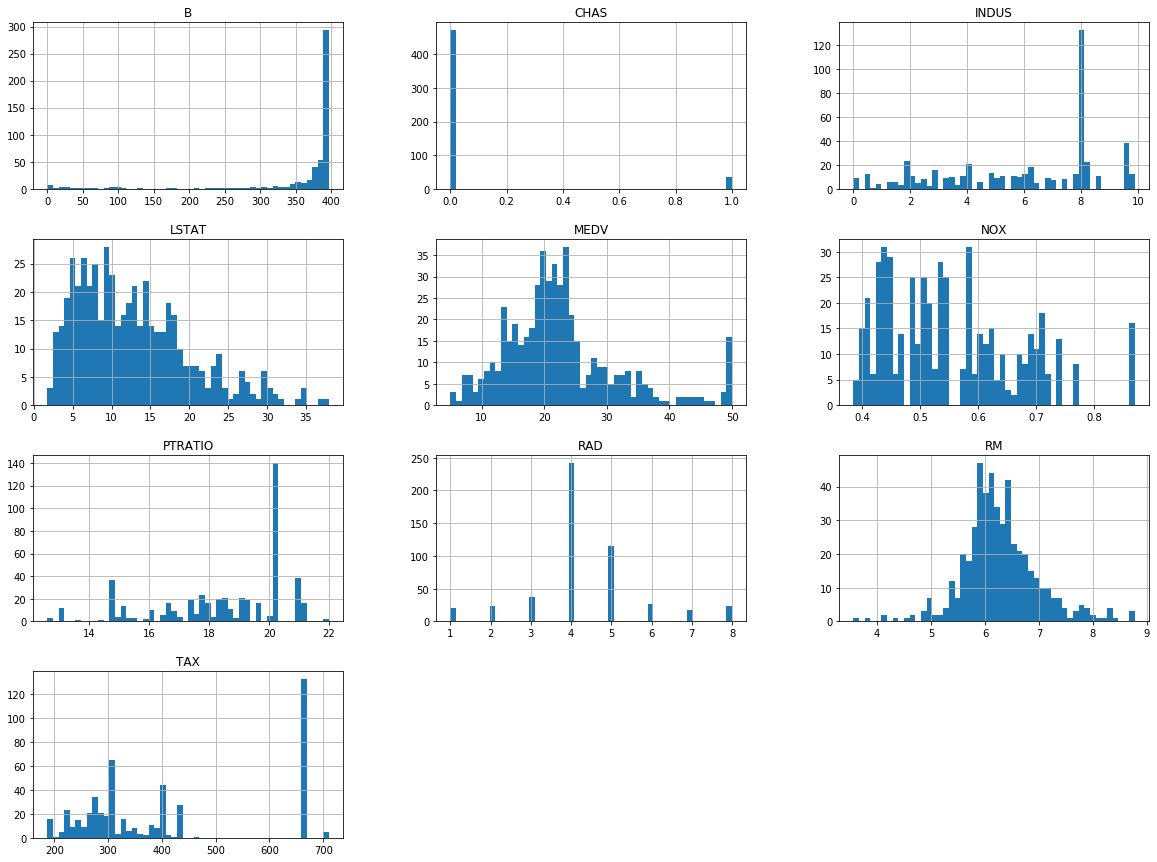

In [8]:
# for plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

In [9]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
#for leanring purpose

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test_set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test_set: {len(test_set)}\n")

Rows in train set: 404
Rows in test_set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
# strat_test_set.info()
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
95/7
376/28

13.428571428571429

In [17]:
housing = strat_train_set.copy()

## Looking for Correlations

In [18]:
 corr_matrix = housing.corr()

In [19]:
corr_matrix['MEDV'].sort_values(ascending=False)
# strong positive correlation

MEDV       1.000000
RM         0.672909
B          0.361761
CHAS       0.205066
RAD        0.103903
INDUS     -0.336047
NOX       -0.422873
TAX       -0.456657
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B738C34748>,
      dtype=object)

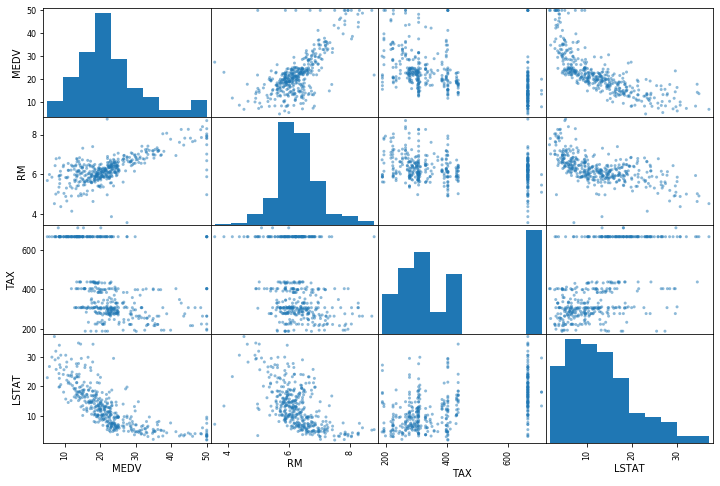

In [20]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'TAX', 'LSTAT']
scatter_matrix(housing[attributes], figsize = (12,8))

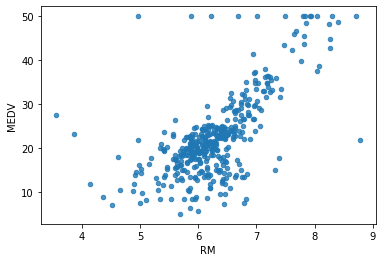

In [21]:
housing.plot(kind="scatter", x='RM', y='MEDV',alpha=0.8)

## Trying Out Attribute Combinations

In [22]:
housing['TAXRM'] = housing['TAX']/housing['RM'] 

In [23]:
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80,3.64,0,0.392,6.108,32,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80,2.01,0,0.435,6.635,29.7,8.344,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.00 1,8.10,0,0.614,6.484,93.6,2.3053 2,4,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.672909
B          0.361761
CHAS       0.205066
RAD        0.103903
INDUS     -0.336047
NOX       -0.422873
TAX       -0.456657
PTRATIO   -0.493534
TAXRM     -0.524622
LSTAT     -0.740494
Name: MEDV, dtype: float64

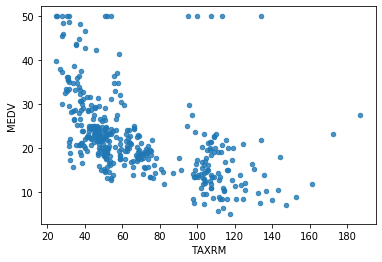

In [26]:
housing.plot(kind="scatter", x='TAXRM', y='MEDV',alpha=0.8)

## Missing Attributes

## To take care of missing attributes, you have three options:
##     1. Get rid of the missing data points
##     2. Get rid of the whole attributes
##     3. Set the values to some values(0, mean or median)

In [27]:
# a = housing.dropna(subset=["RM"]) 
# 1. note that the original housing dataframe will remain unchanged# a.housing.shape  

In [28]:
# housing.drop("RM", axis=1) - 2
# note there is no RM column and also note that the original housing dataframe will remain unchanged

In [29]:
# median = housing["RM"].median() 
# 3.compute median
# median

In [30]:
# housing["RM"].fillna(median)
# note that the original housing dataframe will remain unchanged

In [31]:
# housing.describe()
# before we started filling attributes

In [32]:
# from sklearn.impute import SimpleImputer
# def __init__(strategy=None):
# imputer = SimpleImputer(strategy="median")
# imputer = SimpleImputer(strategy='median')
# imputer.fit(housing)
#     SimpleImputere()

In [33]:
# imputer.statistics_

In [34]:
# X = imputer.transform(housing)

In [35]:
# housing_tr = pd.DataFrame(X, colums=housing.colums)

In [36]:
# housing_tr.describe()

## Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimate some parameter based on a dataset. Eg. imputer. It has a fit method and transform method.Fit method - fits the dataset and calculates internal parameters.(hyper parameters)
   
2. Transformers - transform method takes input and returns output based on the learning from fit(). It also has a convenience function called fit_transform() which fits and then transforms

3. Predictors - LinearRegression model is an example of predictor.fit() and predict() are two common functions. It also gives score function evaluate the predictions.

## Features Scaling

Two types of feature scaling methods
1. Min-max scaling (Normalization)
      (value - min)/(max - min)
      sklearn provides a class called MinMaxScaler for this
2. Standardization
      (value - mean)/ std
      sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# my_pipeline = Pipeline([
# #     ('imputer', SimpleImputer(strategy='median')),
# #       ........ add as many as you want in your pipeline
#     ('std_scaler', StandardScaler()),
# ])
my_pipeline = Pipeline(['housing',('std_scaler', StandardScaler()),])

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'o' (type <class 'str'>) doesn't

In [ ]:
# pd.get_dummies(string column)

housing_num_tr =  my_pipeline.fit_transform(housing_tr)
# except ValueError:


In [ ]:
housing_tr